In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import os
import statistics as stat
from PIL import Image   # pip install pillow
import pickle


In [3]:
dataset = "Animal-Sound-Dataset"

bird_data = dataset + "/Bird"

In [4]:
filepath = str(os.getcwd())
filepath = os.path.dirname(filepath) +"/Animal-Sound-Dataset"
print(filepath)

/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset


In [65]:
soundfiles = {}
all_files = [os.path.join(filepath, f) for f in os.listdir(filepath) if "README" not in f]
print(all_files)
for animal_folder in all_files:
    print(os.listdir(animal_folder))
    for wav in os.listdir(animal_folder):
        #print(wav)
        idx = wav.index("_")
        label = wav[:idx]
        #print(label)
        try:
            soundfiles[label].append(animal_folder+"/"+wav)
        except:
            soundfiles[label] = []
            soundfiles[label].append(animal_folder+"/"+wav)
print(soundfiles)

['/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Cow', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Sheep', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Chicken', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Monkey', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Dog', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Lion', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Frog', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Donkey', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Cat', '/home/zjiamiao2003/DeepAudioNet/Animal-Sound-Dataset/Bird']
['Cow_23.wav', 'Cow_75.wav', 'Cow_50.wav', 'Cow_2.wav', 'Cow_69.wav', 'Cow_15.wav', 'Cow_39.wav', 'Cow_65.wav', 'Cow_35.wav', 'Cow_60.wav', 'Cow_48.wav', 'Cow_24.wav', 'Cow_7.wav', 'Cow_29.wav', 'Cow_43.wav', 'Cow_32.wav', 'Cow_73.wav', 'Cow_70.wav', 'Cow_52.wav', 'Cow_36.wav', 'Cow_11.wav', 'Cow_47.wav', 'Cow_71.wav', 'Cow_64.wav', 'Cow_19.wav', 'Cow_5.wav', 'Cow_4.wav', 'Cow_21.w

[2.2256689342403626, 4.471836734693878, 2.0475398786789487, 1.7705215419501135, 1.6014512471655329, 2.305124716553288, 8.559875, 4.471836734693878, 1.2424489795918368, 1.4851700680272109, 2.365125, 1.4870194707938094, 0.7676190476190476, 2.0450793650793653, 2.6631292517006804, 2.2327437641723358, 1.692154195011338, 1.599875, 4.471836734693878, 1.7007709750566893, 4.6453514739229025, 1.531156462585034, 1.93525, 2.8266666666666667, 1.57175, 4.629875, 5.7004988662131515, 1.6415, 1.4699319727891156, 2.287625, 0.9812244897959184, 1.692154195011338, 4.597375, 1.256780045351474, 1.0021768707482994, 1.2829024943310658, 2.65859410430839, 1.9995, 1.7495238095238095, 1.9621768707482994, 1.5920181405895693, 8.103764172335602, 1.6127437641723357, 4.115918367346938, 4.377142857142857, 3.8140589569161, 1.963125, 1.5663492063492064, 2.573469387755102, 2.2277551020408164, 6.9996875, 2.2277551020408164, 4.377142857142857, 2.086984126984127, 1.34475, 2.111, 1.5867573696145125, 2.6631292517006804, 1.94752

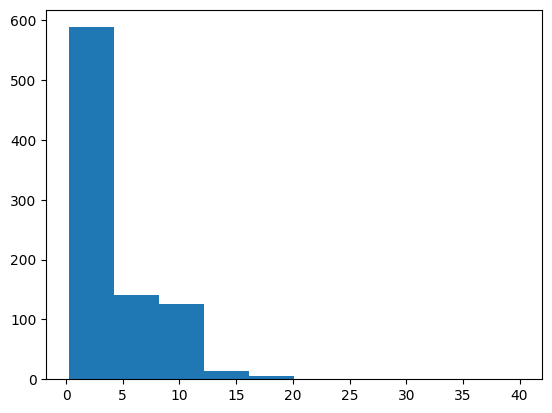

40.0
0.2217687074829932
2.5


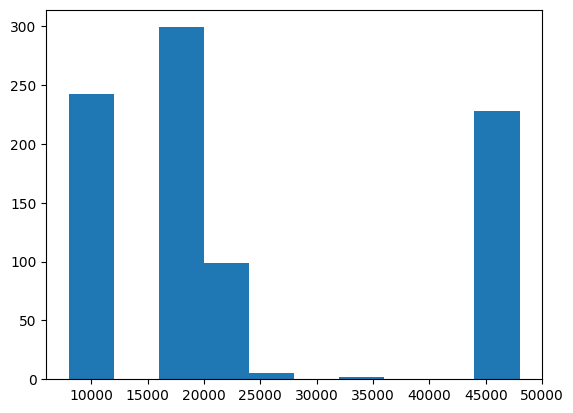

48000
8000


In [66]:
# Code to see input data parameters (Length of audio and sampling rate)
soundlength = []
soundSampleRate = []
# Plot length of all audio files
for label in soundfiles:
    for wav in soundfiles[label]:
        soundlength.append(librosa.get_duration(path=wav))
        soundSampleRate.append(librosa.get_samplerate(path=wav))
print(soundlength)

# Try plotting:
fig1 = plt.hist(soundlength)
plt.show()
print(max(soundlength))
print(min(soundlength))
print(stat.median(soundlength))

fig2 = plt.hist(soundSampleRate)
plt.show()
print(max(soundSampleRate))
print(min(soundSampleRate))


C:\Users\gordo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


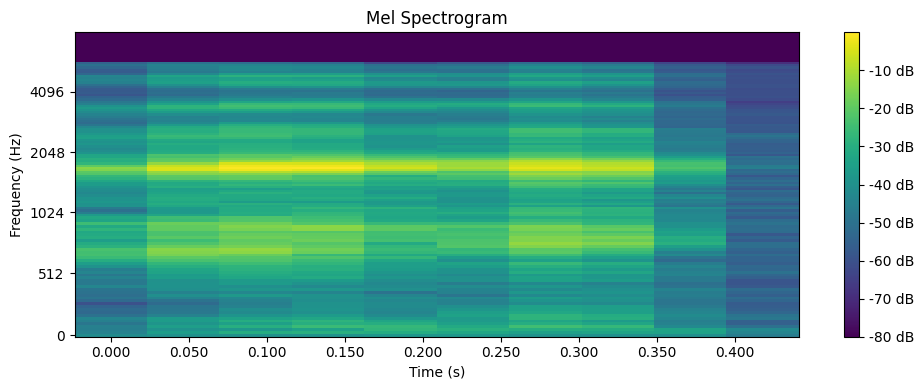

In [12]:

#audio_path = bird_data + "/Bird_1.wav"
audio_path = filepath+"/Frog/Frog_1.wav"

y, sr = librosa.load(audio_path, sr=None)  # sr=None preserves the original sampling rate

# Compute the Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB for visualization

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", fmax=8000, cmap="viridis")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()

sd.play(y, sr)
sd.wait()


In [13]:
print(y,sr)

[0. 0. 0. ... 0. 0. 0.] 11025


In [34]:
print(soundfiles)
for k,v in soundfiles.items():
    print(v)

{'Bird': ['c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/Bird_1.wav', 'c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/Bird_10.wav', 'c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/Bird_100.wav', 'c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/Bird_101.wav', 'c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/Bird_102.wav', 'c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/Bird_103.wav', 'c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/Bird_104.wav', 'c:\\Users\\gordo\\Desktop\\Gordon\\Fall 2024\\ECE460J\\Final Project\\DeepAudioNet/Animal-Sound-Dataset\\Bird/

In [21]:
spectrogram_list = []
for animal_label, soundlist in soundfiles.items():
    for audio_path in soundlist:
        y, sr = librosa.load(audio_path, sr=None)  # sr=None preserves the original sampling rate

        # Compute the Mel spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB for visualization

        specttuple = (mel_spec_db, animal_label, sr)
        spectrogram_list.append(specttuple)

C:\Users\gordo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [24]:
with open('spectrogram_and_labels.pickle','wb') as modelFile:
     pickle.dump(spectrogram_list,modelFile)

In [2]:
with open('spectrogram_and_labels.pickle','rb') as modelFile:
     spectrogram_list = pickle.load(modelFile)

In [3]:
print(spectrogram_list[0])

(array([[-70.73892 , -77.10472 , -80.      , ..., -80.      , -55.124165,
        -46.136417],
       [-70.830894, -77.59591 , -80.      , ..., -80.      , -55.147633,
        -46.14151 ],
       [-70.75667 , -77.15039 , -80.      , ..., -80.      , -55.14884 ,
        -46.14128 ],
       ...,
       [-48.938725, -42.039642, -39.19322 , ..., -54.852562, -49.044716,
        -44.429115],
       [-52.250393, -46.32773 , -45.082275, ..., -48.51326 , -41.100304,
        -41.320175],
       [-53.35046 , -49.623528, -50.05625 , ..., -45.48082 , -47.530014,
        -45.829254]], dtype=float32), 'Bird', 44100)


(array([[-70.73892 , -77.10472 , -80.      , ..., -80.      , -55.124165,
        -46.136417],
       [-70.830894, -77.59591 , -80.      , ..., -80.      , -55.147633,
        -46.14151 ],
       [-70.75667 , -77.15039 , -80.      , ..., -80.      , -55.14884 ,
        -46.14128 ],
       ...,
       [-48.938725, -42.039642, -39.19322 , ..., -54.852562, -49.044716,
        -44.429115],
       [-52.250393, -46.32773 , -45.082275, ..., -48.51326 , -41.100304,
        -41.320175],
       [-53.35046 , -49.623528, -50.05625 , ..., -45.48082 , -47.530014,
        -45.829254]], dtype=float32), 'Bird', 44100)


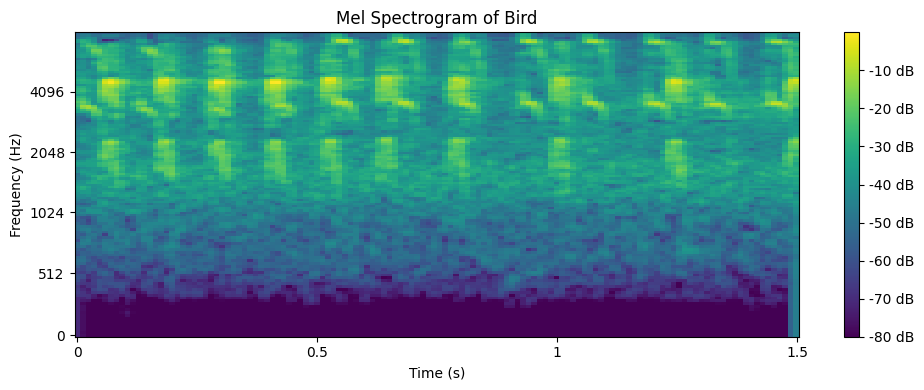

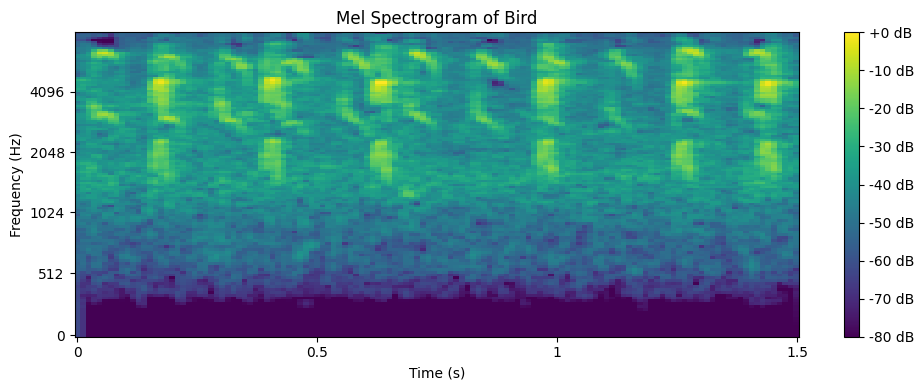

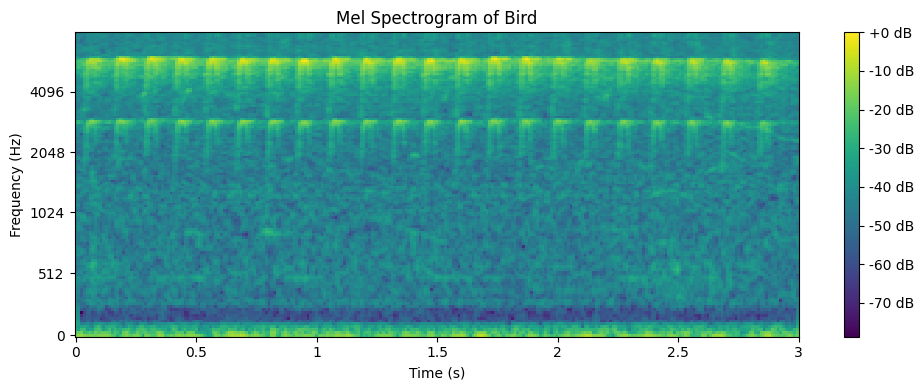

In [64]:
print(spectrogram_list[0])
for i in range(3):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_list[i][0], sr=spectrogram_list[i][2], x_axis="time", y_axis="mel", fmax=8000, cmap="viridis")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel Spectrogram of " + spectrogram_list[i][1])
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()

In [3]:
print(len(spectrogram_list))

875


Now that the spectrograms are being generated correctly, try to crop out everything useless (title, white space, key, axis)

0
100
200
300
400
500
600
700
800


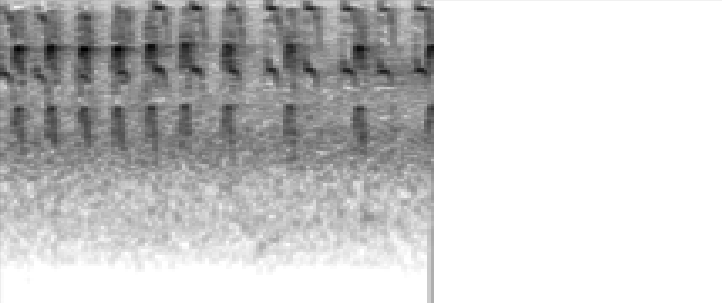

In [64]:
# Creates spectrograms and crops images to size
images_crop = []
image_num = 0

# Crop spectrograms
for spec, label, sr in spectrogram_list:    
    img = plt.figure(figsize=(10, 4))
    librosa.display.specshow(spec, sr=sr, x_axis="time", y_axis="mel", fmax=8000, cmap="Grays")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel Spectrogram of " + label)
    plt.xlabel("Time (s)")
    plt.xlim((0, 2.5))
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    # plt.show()

    # save as PNG
    img.savefig('spec_im.png')

    with Image.open('spec_im.png').convert('L') as im:
        #https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop
        im_crop = im.crop((81, 38, 803, 341))
        images_crop.append(im_crop)
    
    plt.close()

    if (image_num % 100) == 0:
        print(image_num)
    image_num += 1

images_crop[0]

In [65]:
print(images_crop[0])

<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D49B7D90>


In [67]:
spec_image_crop = []
for i in range(len(spectrogram_list)):
     spec_image_crop.append((images_crop[i], spectrogram_list[i][1], spectrogram_list[i][2])) # (Cropped Image, Label, Sampling rate)

with open('spec_image_crop.pickle','wb') as modelFile:
     pickle.dump(spec_image_crop,modelFile)

In [57]:
with open('spec_image_crop.pickle','rb') as modelFile:
     spec_image_crop = pickle.load(modelFile)

In [68]:
print(spec_image_crop)

[(<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D49B7D90>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D0C05B40>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0A317C850>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D53F44F0>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D0A98BB0>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF09E436260>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0B64B1A20>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0C5C306D0>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0CA902920>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D0AC8820>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D076B310>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722x303 at 0x7FF0D4547EE0>, 'Bird', 44100), (<PIL.Image.Image image mode=L size=722

Now, we need to convert the PIL image for each cropped spectrogram into a (m x n x 1) array

In [74]:
# spec_image_crop[:][0] = np.array(spec_image_crop[:][0])
# pix = np.array(spec_image_crop)
spec_image_arr = []
for i in range(len(spec_image_crop)):
    spec_image_arr.append( (np.asarray(spec_image_crop[i][0]), spec_image_crop[i][1], spec_image_crop[i][2]))

Now that spectrogram image is in array form and grayscale, save to pickle model.

In [75]:
with open('nparr_spec_image.pickle','wb') as modelFile:
     pickle.dump(spec_image_arr,modelFile)

In [4]:
with open('nparr_spec_image.pickle','rb') as modelFile:
     spec_image_arr = pickle.load(modelFile)

[(array([[166, 176, 176, ..., 241, 241, 241],
       [165, 175, 175, ..., 255, 255, 255],
       [165, 175, 175, ..., 255, 255, 255],
       ...,
       [238, 252, 252, ..., 255, 255, 255],
       [237, 251, 251, ..., 255, 255, 255],
       [237, 251, 251, ..., 255, 255, 255]], dtype=uint8), 'Bird', 44100), (array([[186, 197, 197, ..., 241, 241, 241],
       [189, 201, 201, ..., 255, 255, 255],
       [189, 201, 201, ..., 255, 255, 255],
       ...,
       [223, 236, 236, ..., 255, 255, 255],
       [223, 236, 236, ..., 255, 255, 255],
       [223, 236, 236, ..., 255, 255, 255]], dtype=uint8), 'Bird', 44100), (array([[154, 164, 164, ..., 149, 149, 149],
       [154, 164, 164, ..., 158, 162, 162],
       [154, 164, 164, ..., 158, 162, 162],
       ...,
       [ 73,  78,  78, ..., 120,  85,  85],
       [ 50,  53,  53, ...,  68,  77,  77],
       [ 50,  53,  53, ...,  68,  77,  77]], dtype=uint8), 'Bird', 44100), (array([[187, 198, 198, ..., 241, 241, 241],
       [198, 210, 210, ..., 25

In [20]:
import random
import math
import torch
from torchvision import transforms
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import interpolate

class AudioCNN(nn.Module):
    def __init__(self, num_classes):
        super(AudioCNN, self).__init__()
        
        # More memory-efficient architecture
        self.features = nn.Sequential(
            # First conv block - input shape: (batch_size, 1, 128, 128)
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: 64x64
            
            
            # Second conv block
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
             nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: 32x32
           
            
            # Third conv block
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: 16x16
            
            # Fourth conv block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: 8x8
        )
        
        # Calculate the size of flattened features (128 * 8 * 8 = 8192)
        self.classifier = nn.Sequential(
            nn.Linear(8192, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        # Add channel dimension if not present
        if x.dim() == 3:
            x = x.unsqueeze(1)
        
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

class AudioDataset(torch.utils.data.Dataset):
    def __init__(self, data, targets, transform=None):
        super(AudioDataset, self).__init__()
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform
        self.target_size = 128  # Fixed size for all spectrograms
        
    def resize_spectrogram(self, spec):
        # Convert to tensor for interpolation
        spec_tensor = torch.tensor(spec).unsqueeze(0).unsqueeze(0).float()
        
        # Resize to target size
        resized = interpolate(spec_tensor, size=(self.target_size, self.target_size), 
                            mode='bilinear', align_corners=False)
        
        return resized.squeeze().numpy()
    
    def normalize_spectrogram(self, spec):
        # Min-max normalization
        spec_min = np.min(spec)
        spec_max = np.max(spec)
        if spec_max > spec_min:
            return (spec - spec_min) / (spec_max - spec_min)
        return spec
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        spec = self.data[idx]
        
        # Resize and normalize
        spec = self.resize_spectrogram(spec)
        spec = self.normalize_spectrogram(spec)
        
        spec = torch.tensor(spec, dtype=torch.float32)
        
        if self.transform:
            spec = self.transform(spec)
            
        return spec, self.targets[idx]

def train_model(model, train_loader, test_loader, num_epochs=50, device="cuda"):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    model = model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Print batch progress
            if batch_idx % 10 == 0:
                print(f'Epoch {epoch+1}/{num_epochs} - Batch {batch_idx}/{len(train_loader)}, '
                      f'Loss: {loss.item():.4f}')
        
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")
    
    return model

if __name__ == "__main__":
    # Split data
    random.shuffle(spectrogram_list)
    frac_train = 0.75
    n_train = int(math.floor(len(spectrogram_list) * frac_train))
    
    train_spectrogram = spectrogram_list[:n_train]
    test_spectrogram = spectrogram_list[n_train:]
    
    train_specs = [element[0] for element in train_spectrogram]
    test_specs = [element[0] for element in test_spectrogram]
    train_classes = [class_num_dict[element[1]] for element in train_spectrogram]
    test_classes = [class_num_dict[element[1]] for element in test_spectrogram]
    
    # Create datasets with smaller batch size
    train_dataset = AudioDataset(train_specs, train_classes)
    test_dataset = AudioDataset(test_specs, test_classes)
    
    # Use smaller batch size to reduce memory usage
    batch_size = 8
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                             shuffle=True, num_workers=0)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                            shuffle=False, num_workers=0)
    
    # Initialize model
    num_classes = len(class_num_dict)
    model = AudioCNN(num_classes)
    
    # Train model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = train_model(model, train_loader, test_loader, device=device)
    
    # Evaluate
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

Epoch 1/50 - Batch 0/82, Loss: 2.2814
Epoch 1/50 - Batch 10/82, Loss: 3.8936
Epoch 1/50 - Batch 20/82, Loss: 1.4892
Epoch 1/50 - Batch 30/82, Loss: 1.0254
Epoch 1/50 - Batch 40/82, Loss: 2.0013
Epoch 1/50 - Batch 50/82, Loss: 1.2024
Epoch 1/50 - Batch 60/82, Loss: 3.1042
Epoch 1/50 - Batch 70/82, Loss: 1.7900
Epoch 1/50 - Batch 80/82, Loss: 1.2886
Epoch 1/50, Average Loss: 2.8365
Epoch 2/50 - Batch 0/82, Loss: 1.5860
Epoch 2/50 - Batch 10/82, Loss: 1.1160
Epoch 2/50 - Batch 20/82, Loss: 1.5985
Epoch 2/50 - Batch 30/82, Loss: 0.9106
Epoch 2/50 - Batch 40/82, Loss: 1.3170
Epoch 2/50 - Batch 50/82, Loss: 1.1982
Epoch 2/50 - Batch 60/82, Loss: 0.7482
Epoch 2/50 - Batch 70/82, Loss: 1.1947
Epoch 2/50 - Batch 80/82, Loss: 1.2813
Epoch 2/50, Average Loss: 1.3364
Epoch 3/50 - Batch 0/82, Loss: 1.1119
Epoch 3/50 - Batch 10/82, Loss: 0.7890
Epoch 3/50 - Batch 20/82, Loss: 1.1368
Epoch 3/50 - Batch 30/82, Loss: 0.7359
Epoch 3/50 - Batch 40/82, Loss: 1.0168
Epoch 3/50 - Batch 50/82, Loss: 1.5222
E

In [11]:
print(train_specs[0].shape)


(128, 345)


In [5]:
print(train_classes)

[3, 0, 1, 9, 0, 1, 0, 1, 5, 1, 1, 9, 4, 1, 4, 5, 1, 3, 5, 9, 3, 4, 4, 8, 9, 0, 1, 4, 9, 1, 0, 1, 7, 9, 1, 7, 0, 0, 4, 2, 3, 4, 0, 1, 4, 1, 4, 3, 3, 4, 4, 6, 4, 6, 1, 4, 1, 3, 1, 1, 1, 5, 0, 0, 6, 0, 4, 4, 4, 1, 1, 0, 6, 0, 4, 4, 0, 1, 6, 1, 4, 4, 4, 4, 2, 1, 5, 7, 7, 7, 1, 3, 0, 4, 5, 0, 4, 4, 5, 1, 6, 9, 4, 7, 0, 4, 4, 1, 4, 0, 1, 4, 0, 4, 3, 4, 1, 4, 8, 4, 5, 6, 2, 4, 3, 3, 4, 9, 8, 7, 3, 1, 0, 1, 9, 3, 1, 6, 0, 8, 0, 4, 4, 1, 0, 0, 4, 3, 4, 1, 7, 3, 3, 4, 1, 1, 6, 5, 4, 0, 1, 1, 6, 3, 9, 4, 0, 3, 6, 4, 0, 2, 4, 0, 5, 1, 0, 8, 0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 3, 4, 8, 6, 4, 1, 4, 1, 0, 5, 2, 0, 8, 9, 9, 9, 9, 1, 1, 1, 1, 1, 7, 1, 6, 1, 0, 1, 4, 0, 0, 0, 2, 9, 4, 4, 7, 6, 6, 0, 0, 4, 4, 0, 0, 1, 1, 2, 8, 0, 2, 0, 1, 0, 0, 6, 1, 4, 1, 4, 4, 1, 3, 8, 3, 8, 1, 4, 1, 1, 0, 0, 3, 4, 1, 4, 4, 0, 4, 0, 6, 0, 4, 5, 3, 1, 4, 3, 1, 0, 1, 0, 0, 4, 0, 3, 2, 0, 1, 4, 3, 4, 8, 1, 4, 1, 7, 1, 0, 7, 2, 6, 1, 0, 2, 1, 1, 9, 1, 1, 6, 2, 0, 5, 1, 1, 4, 4, 7, 2, 1, 0, 4, 1, 6, 0, 4, 9, 1, 9, 4, 1, 0, 8, 1, 

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os


In [8]:
from PIL import Image
import numpy as np
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data, targets, transform=None):
        super(MyDataset, self).__init__()
        self.data = data  # Data should be in a NumPy array format
        self.targets = torch.LongTensor(targets)  # Convert targets to LongTensor
        self.transform = transform  # Optional transformations (e.g., normalization, augmentation)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]  # Original spectrogram data
        target = self.targets[idx]  # Corresponding label
        
        if self.transform:
            # Convert NumPy array to PIL Image and apply transformation
            img = Image.fromarray((img * 255).astype(np.uint8))  # Scale to [0, 255] if needed
            img = self.transform(img)  # Apply transformations (e.g., ToTensor, Normalize)
        
        return img, target


In [7]:
# transform = transforms.Compose([
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize((0.5), (0.5))
#     ])

from torchvision.transforms import v2
from torchvision.io import decode_image

# transform = v2.Compose([
#     v2.ToImage(),  # Convert to tensor, only needed if you had a PIL image
#     v2.ToDtype(torch.uint8, scale=True),  # optional, most input are already uint8 at this point
#     # ...
#     v2.RandomResizedCrop(size=(224, 224), antialias=True),  # Or Resize(antialias=True)
#     # ...
#     v2.ToDtype(torch.float32, scale=True),  # Normalize expects float input
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

transform = None

train_dataset = MyDataset(train_specs, train_classes, transform=transform)
test_dataset = MyDataset(test_specs, test_classes, transform=transform)

train_dataset = torch.utils.data.DataLoader(train_dataset, batch_size=3,
                                            shuffle=True, num_workers=2,)
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size=3,
                                            shuffle=True, num_workers=2)
dataloaders = {'train': train_dataset, 'test': test_dataset}
dataset_sizes = {'train': len(train_dataset), 'test': len(test_dataset)}
class_names = train_classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



In [21]:
print(dataloaders)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x000001A0104DED10>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x000001A0104F61D0>}


In [8]:
from torchvision import models

# Now we load a pre-trained model, and replace the last layer with a non-initialized linear layer.

# This command loads a pre-trained model
model_ft = models.resnet18(weights = models.ResNet18_Weights.DEFAULT)

In [9]:
input_features = model_ft.fc.in_features
output_features = 10#model_ft.fc.out_features
print(input_features)
print(output_features)

512
10


In [10]:
from torch import nn

# Define the model's fully connected layer
model_ft.fc = nn.Linear(input_features, output_features)

In [12]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

# We need to set the loss function, the optimizer, and the learning rate scheduler
criterion = nn.CrossEntropyLoss()
# though we're fine tuning, we're updating all parameters
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# the scheduler decreases the learning rate by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
import time
import copy
import torch

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Debug statements
                    print(f'Inputs: {inputs}')
                    print(f'Labels: {labels}')
                    print(f'Outputs: {outputs}')
                    print(f'Predictions: {preds}')
                    print(f'Loss: {loss.item()}')

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Assuming model_ft, criterion, optimizer_ft, and exp_lr_scheduler are already defined
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


In [26]:
import time 
import copy


model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=25)

TypeError: train_model() missing 3 required positional arguments: 'dataloaders', 'dataset_sizes', and 'device'